In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import messagebox
import folium
import webbrowser
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
data = pd.read_csv('../data/new_arabic_dialect_dataset.csv')

In [3]:
import pandas as pd

# Assuming you have a DataFrame called 'data' with columns 'sentence' and 'dialect'

# Create an empty DataFrame to store the sampled sentences
new_data = pd.DataFrame(columns=['sentence', 'dialect', 'sentence_clean'])

# Iterate over each dialect
dialects = data['dialect'].unique()
for dialect in dialects:
    # Select 100 sentences from each dialect
    dialect_sentences = data[data['dialect'] == dialect].sample(n=1000, random_state=42)
    
    # Append the sampled sentences to the new DataFrame
    new_data = new_data.append(dialect_sentences)

# Save the new DataFrame to a CSV file
new_data = new_data.fillna('')
new_data.to_csv('../data/data_sample.csv', index=False)

C:\Users\Fares\AppData\Local\Temp\ipykernel_16960\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\Users\Fares\AppData\Local\Temp\ipykernel_16960\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\Users\Fares\AppData\Local\Temp\ipykernel_16960\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\Users\Fares\AppData\Local\Temp\ipykernel_16960\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\U

In [4]:
from sklearn.model_selection import train_test_split

X = new_data.sentence_clean
y = new_data.dialect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=new_data['dialect'])
print(X_train)

187781                               هـ بناخدوله وحدة الزوي
121961      صارت الساعه بدونك واقفه الدقايق حالفه تمر بلياك
74112     نادرا هتلاقي حد مجربش الحشيش أو الكحول ظنا منه...
7414                        بأشر وبعطيك ولا يهمك راسي حارتك
215772       فيه تلاعب المقطع ليش يقطع شوي أثناء رفع الكورة
                                ...                        
124449    نريد بعد واحد نزيه يجيب تزين واحد شغال يجيب شغ...
96920            مادري واله انتي راد تويت مادري عاد شنو كان
278578                             وين بيذيعون الإطلاق ومتى
106094                         قبل نمشي مكن تعطيني كم دقيقة
66305                        تستاهل زيون كم ريتويت حساب ميز
Name: sentence_clean, Length: 15200, dtype: object


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import StratifiedKFold

vectorizer_tfidf = TfidfVectorizer()
classifier_tfidf_Logistic = LogisticRegression(max_iter=1000)

model_tfidf_Logistic = Pipeline([
    ("vectorizer", vectorizer_tfidf),
    #("scaler", StandardScaler(with_mean=False)),
    ("classifier", classifier_tfidf_Logistic)
])

param_grid = {
    "vectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "classifier__C": [0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"]
}

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_tfidf_Logistic, param_grid, cv=cv, scoring="accuracy")
grid_search.fit(X_train, y_train)

C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\si

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='accuracy')

In [6]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'classifier__C': 10, 'classifier__penalty': 'l2', 'vectorizer__ngram_range': (1, 2)}
0.3947368421052631


In [7]:
# Fit the model with the best parameters
model_tfidf_Logistic.set_params(**best_params)
model_tfidf_Logistic.fit(X_train, y_train)

# Save the model
joblib.dump(model_tfidf_Logistic, '../models/model_tfidf_Logistic.pkl')

['../models/model_tfidf_Logistic.pkl']

In [17]:
from sklearn.metrics import accuracy_score, classification_report

saved_model_tfidf_Logistic = joblib.load('../models/model_tfidf_Logistic.pkl')

predicted_train_tfidf_Logistic = saved_model_tfidf_Logistic.predict(X_train)
accuracy_train_tfidf_Logistic = accuracy_score(y_train, predicted_train_tfidf_Logistic)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf_Logistic))

predicted_test_tfidf_Logistic = saved_model_tfidf_Logistic.predict(X_test)
accuracy_test_tfidf_Logistic = accuracy_score(y_test, predicted_test_tfidf_Logistic)
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_Logistic))

Accuracy Training data: 42.9%
Accuracy Test data: 42.6%


In [19]:
performance_metrics = classification_report(y_test, predicted_test_tfidf_Logistic)
print(performance_metrics)

              precision    recall  f1-score   support

          AE       0.25      0.24      0.25       200
          BH       0.21      0.18      0.20       200
          DZ       0.44      0.47      0.45       200
          EG       0.52      0.64      0.58       200
          IQ       0.51      0.52      0.52       200
          JO       0.30      0.29      0.29       200
          KW       0.30      0.29      0.30       200
          LB       0.44      0.52      0.47       200
          LY       0.48      0.46      0.47       200
          MA       0.68      0.65      0.66       200
         MSA       0.76      0.88      0.81       200
          OM       0.27      0.26      0.27       200
          PL       0.32      0.35      0.34       200
          QA       0.27      0.29      0.28       200
          SA       0.33      0.33      0.33       200
          SD       0.58      0.59      0.59       200
          SY       0.39      0.32      0.35       200
          TN       0.64    

In [21]:
model_data = pd.DataFrame(columns=['Model', 'Performance Metrics', 'Accuracy'])
model_data = model_data.append({'Model': 'Logistic', 'Performance Metrics': performance_metrics, 'Accuracy': accuracy_test_tfidf_Logistic}, ignore_index=True)
model_data.to_csv('../data/test_models.csv', index=False)

C:\Users\Fares\AppData\Local\Temp\ipykernel_16960\879022785.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_data = model_data.append({'Model': 'Logistic', 'Performance Metrics': performance_metrics, 'Accuracy': accuracy_test_tfidf_Logistic}, ignore_index=True)


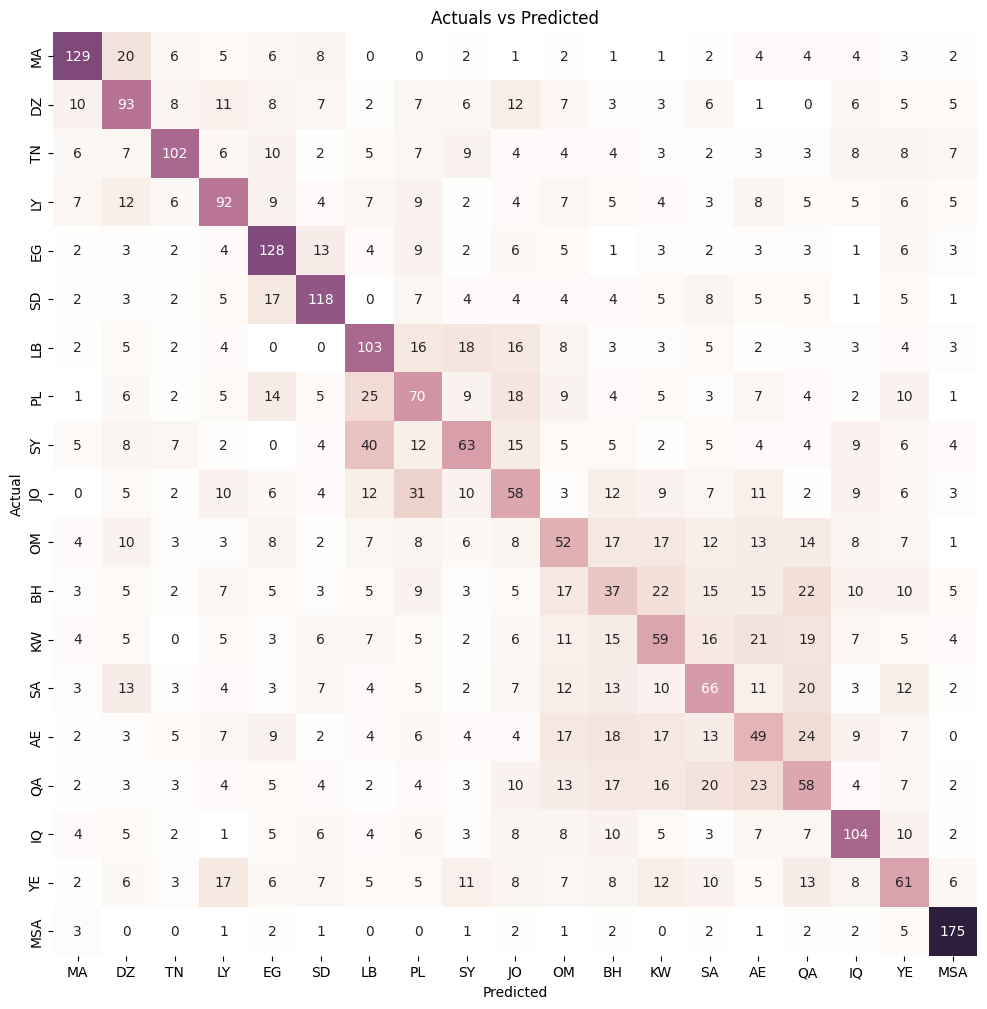

In [8]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, predicted_test_tfidf_Logistic,labels=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
data_cm = pd.DataFrame(data, columns=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"], index = ["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
data_cm.index.name = 'Actual'
data_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(data_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size':10})
plt.title('Actuals vs Predicted')
plt.savefig('../data/figs/Logistic_matrix.png')
plt.show()

In [38]:
def get_country_coordinates(country,proximity_score):
    # Define a dictionary with the latitude and longitude coordinates for each Arabic country
    country_coordinates = {
        "MA": [31.7917, -7.0926],
        "DZ": [36.7538, 3.0588],
        "TN": [33.8869, 9.5375],
        "LY": [26.3351, 17.2283],
        "EG": [26.8206, 30.8025],
        "SD": [15.5007, 32.5599],
        "LB": [33.8547, 35.8623],
        "PL": [33.8547, 35.8623],
        "SY": [34.8021, 38.9968],
        "JO": [30.5852, 36.2384],
        "OM": [21.4735, 55.9754],
        "BH": [26.0667, 50.5577],
        "KW": [29.3117, 47.4818],
        "SA": [23.8859, 45.0792],
        "AE": [23.4241, 53.8478],
        "QA": [25.3548, 51.1839],
        "IQ": [33.2232, 43.6793],
        "YE": [15.5527, 48.5164],
        "MSA": [24.0000, 45.0000]  # Placeholder coordinates for MSA
    }
    
    # Define the gradient colors from yellow to red
    colors = ["red","green"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    # Map the proximity score to the gradient colormap
    color_rgb = cmap(proximity_score)

    # Convert the RGB color to hexadecimal format
    color_hex = rgb2hex(color_rgb)

    return country_coordinates.get(country, [0, 0]), color_hex

In [39]:
def predict_dialect():
    sentence = entry.get()
    minimum_probability = float('inf')
    maximum_probability = float('-inf')

    if sentence.strip() == '':
        messagebox.showerror("Error", "Please enter an Arabic sentence.")
        return

    prediction = saved_model_tfidf_Logistic.predict([sentence])
    probabilities = saved_model_tfidf_Logistic.predict_proba([sentence])[0]

    result = f"The predicted dialect is: {prediction}\n"
    result += "Prediction probabilities for each dialect:\n"
    for dialect, probability in zip(saved_model_tfidf_Logistic.classes_, probabilities):
        result += f"{dialect}: {probability:.4f}\n"
        
        if probability < minimum_probability:
            minimum_probability = probability
        
        if probability > maximum_probability:
            maximum_probability = probability
        
        # Create a map centered around Arabic countries
    m = folium.Map(location=[24, 43], zoom_start=4)

    # Add a marker for the predicted dialect country
    predicted_country = prediction[0]
    folium.Marker(location=get_country_coordinates(predicted_country, 0)[0],
                  popup=f"Predicted: {predicted_country}",
                  icon=folium.Icon(color='green', icon='info-sign')).add_to(m)

    # Add heatmap layers for each Arabic country
    for dialect, probability in zip(saved_model_tfidf_Logistic.classes_, probabilities):
        proximity_score = 1 - probability  # Calculate the proximity score
        normalized_score = (proximity_score - minimum_probability) / (maximum_probability - minimum_probability)
        coordinates, color = get_country_coordinates(dialect, normalized_score)  # Get coordinates and color
        folium.CircleMarker(location=coordinates,
                            radius=10,
                            color='{}'.format(color),
                            fill=True,
                            fill_color='{}'.format(color),
                            fill_opacity=0.7).add_to(m)

    # Save the map as an HTML file
    map_file = 'heatmap_Logistic.html'
    m.save(map_file)

    # Open the HTML file in a web browser
    webbrowser.open(map_file)

    messagebox.showinfo("Prediction", result)

In [40]:
root = tk.Tk()
root.title("Arabic Dialect Predictor - Logistic Model")

label = tk.Label(root, text="Enter an Arabic sentence:")
label.pack()

entry = tk.Entry(root, width=50)
entry.pack()

button = tk.Button(root, text="Predict", command=predict_dialect)
button.pack()

root.mainloop()